In [1]:
# importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import *

In [2]:
# importation du fichier csv

#data = pd.read_csv("TheTitanidataset.csv")
data = pd.read_csv("TitanicDataset.csv")

In [3]:
# Affichage des cinqs premières du dataset
data.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [62]:
# informations générales sur le dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [63]:
# information générales sur le dataset

data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [64]:
#Affichage des lignes dont la colonne Age est supérieur à 30ans
data[data["age"]>30]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C,C,NaN,NaN
1287,3,0,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.7500,NaN,S,NaN,NaN,NaN
1290,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN
1298,3,0,"Wittevrongel, Mr. Camille",male,36.0,0,0,345771,9.5000,NaN,S,NaN,NaN,NaN


In [5]:
# fonction permettant de calculer la moyenne d'une colonne numérique
def moyenneColonne(colonne):
    return colonne.sum()/len(colonne)
#moyenneColonne(data["age"])

In [6]:
# remplacons les valeurs manquantes de la colonne age par sa moyenne
data["age"]=data["age"].fillna(moyenneColonne(data["age"]))
# verifier si les valeurs manquantes ont été remplacés
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [66]:
# creation de la colonne tailleFamille
data["tailleFamille"] = data["sibsp"] + data["parch"]
#data = data.rename(columns={"cumAge":"tailleFamille"})
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,tailleFamille
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",3
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3


In [28]:
# trier le dataset selon l'age en ordre croissant et afficher les 10 prmières lignes 
#data.sort_values(by="age", ascending = True)
#data["age"]
#data["age"] = sorted(data["age"])
data.iloc[:10, :]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


2. Statistiques Descriptives et Exploration

In [92]:
def moyenne(col):
    som = 0
    for i in range(len(col)):
        som = som + col[i]
    return som/len(col)

# moyenne de la colonne age
moyenne(data["age"])

28.674909870608328

In [111]:
def mediane(col):
    if len(col)%2 != 0:
        return col[(len(col)-1)/2]
    if len(col)%2 == 0:
        return col[len(col)/2]
        
# mediane de la colonne age
mediane(data["age"])

24.0

In [113]:
def ecartType(col):
    som = 0
    for i in range (len(col)):
        som = som + (col[i]-moyenne(col))**2
    return sqrt(som/len(col))
ecartType(data["age"])

13.101015991946047

In [11]:
def mode(col):
    valeurs_occurence =col.value_counts() #dictionnaire où la clé représente l'élément et le valeur le nbre d'occurence
    maxi = valeurs_occurence.values[0] # nbre d'occurence du prémier élément 
    mode = valeurs_occurence.index[0] ## valeur du prémier élément 
    for i in range(1, len(valeurs_occurence)):
        if valeurs_occurence.values[i] > maxi:
            maxi = valeurs_occurence.values[i]
            mode = valeurs_occurence.index[i]
    return mode
mode(data["age"])

24.0

In [11]:
def valeursAberrantes(df, col):
    #premier quartile
    q1 =col.quantile(q=0.25)
    #troisième quartile
    q3 = col.quantile(q=0.75)
    #ecart interquartile
    IQR = q3-q1
    #borne inférieure
    borne_inf = q1-1.5*IQR
    #borne supérieur
    borne_sup = q3-1.5*IQR
    df.clip(lower = borne_inf, upper = borne_sup)
    return df.boxplot(column = col)
valeursAberrantes(data, data["age"])
#data.boxplot(column = "age")
#data.columns
#data["age"]

UFuncTypeError: ufunc 'less_equal' did not contain a loop with signature matching types (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.StrDType'>) -> None

In [13]:
def correlation(col1, col2):
    return col1.corr(col2)
    
#correlation entre l'age et la classe
correlation(data["age"], data["pclass"])

-0.40810623423644365

In [25]:
def tableau_croise(df, col1, col2, col3):
    return pd.pivot_table(data=df, index=col2, columns=col3, values=col1)
    
tableau_croise(data, "survived", "sex", "pclass")

pclass,1,2,3
sex,,,
female,0.965278,0.886792,0.490741
male,0.340782,0.146199,0.152130


3. Visualisation des Données avec Matplotlib & Seaborn

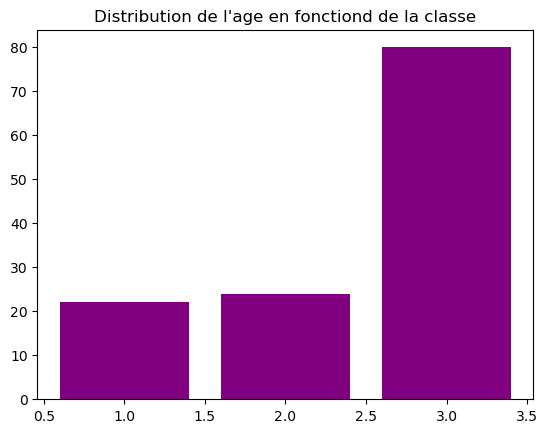

In [126]:
plt.title("Distribution de l'age en fonction de la classe")
plt.bar(data["pclass"], data["age"],  color="purple")
plt.show()

In [14]:
box1 = data["age"][data["pclass"]==1]
box2 = data["age"][data["pclass"]==2]
box3 = data["age"][data["pclass"]==3]
figures, axis = plt.subplots(1, 3, figsize=(30, 10))


axis[0].bar(x=data["age"], height = data["pclass"]==1, color = 'g')
axis[0].set_title("Pclass 1")

axis[1].boxplot(box2)
axis[1].set_title("Pclass 2")

axis[2].boxplot(box3)
axis[2].set_title("Pclass 3")
#boxplot avec seaborn, matplotlib et pandas

<BarContainer object of 1309 artists>

In [16]:
sns.countplot(x="sex", data=data, hue="pclass")

<Axes: xlabel='sex', ylabel='count'>

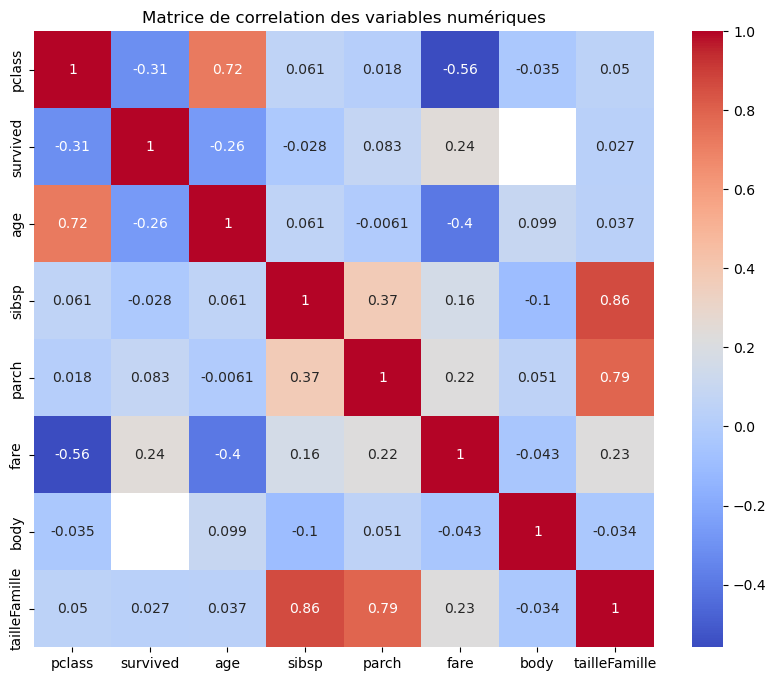

In [153]:
matriceCorrelation = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(matriceCorrelation, annot=True, cmap="coolwarm")
plt.title("Matrice de correlation des variables numériques")
plt.show()

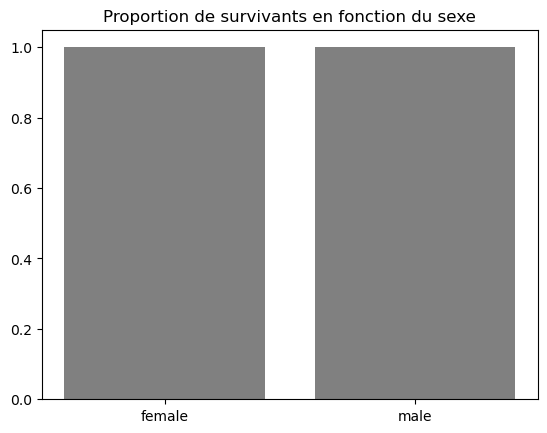

In [155]:
plt.title("Proportion de survivants en fonction du sexe")
plt.bar(data["sex"], data["survived"],   color="gray")
plt.show()

4-Manipulation Avancée des Données

In [19]:
data[["name", "age", "survived"]]

,name,age,survived
0,"Allen, Miss. Elisabeth Walton",29.000000,1
1,"Allison, Master. Hudson Trevor",0.920000,1
2,"Allison, Miss. Helen Loraine",2.000000,0
3,"Allison, Mr. Hudson Joshua Creighton",30.000000,0
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.000000,0
...,...,...,...
1304,"Zabour, Miss. Hileni",14.500000,0
1305,"Zabour, Miss. Thamine",23.877517,0
1306,"Zakarian, Mr. Mapriededer",26.500000,0
1307,"Zakarian, Mr. Ortin",27.000000,0


In [21]:
data.groupby("pclass")["age"].mean()

pclass
1    37.314685
2    29.181553
3    24.540936
Name: age, dtype: float64

In [53]:
#tab = [], tab1 = [], tab2 = []
#for i in range(1309): 
 #       tab.append(i)
set1 = pd.DataFrame({"ID":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], "Lettres":["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]})
set2 = pd.DataFrame({"ID":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], "Noms":["Alice", "Bibiche", "Clarence", "Dja", "Eunice", "Francoise", "Genoise", "Hilary", "Irma", "Jael"]})
set_fusionne = pd.merge(set1, set2, on = "ID", how = "inner")
df = pd.read_csv("TheTitanidataset.csv")
df.head()

,1,2,3,4,5,6,7,8,9,10
0,sn,pclass,survived,NaN,gender,age,family,fare,embarked,date
1,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
2,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
3,2,3,0,Master. Eugene Joseph,male,?,2,20.25,S,02-Jan-90
4,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2,**,S,03-Jan-90


In [23]:
data[(data["pclass"] == 1)&(data["age"] >= 40)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S,8,NaN,"Youngstown, OH"
312,1,0,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,NaN,NaN,"Elkins Park, PA"
314,1,1,"Widener, Mrs. George Dunton (Eleanor Elkins)",female,50.0,1,1,113503,211.5000,C80,C,4,NaN,"Elkins Park, PA"
316,1,0,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C,NaN,NaN,"Geneva, Switzerland / Radnor, PA"
